In [82]:
# encoding=utf-8
import jieba
import collections

### 文本案例
https://www.toutiao.com/i6812433086140121611/?tt_from=mobile_qq&utm_campaign=client_share&timestamp=1586148171&app=news_article_social&utm_source=mobile_qq&utm_medium=toutiao_ios&req_id=2020040612425101001603220624FA2CF8&group_id=6812433086140121611

In [83]:
string = '''我来到北京清华大学,但是乒乓球拍卖完了所以又来到了中国科学技术大学"'''

In [84]:
origin_words = list(jieba.cut(string.replace(' ',''),use_paddle=True))
origin_words

['我',
 '来到',
 '北京清华大学',
 ',',
 '但是',
 '乒乓球',
 '拍卖',
 '完',
 '了',
 '所以',
 '又',
 '来到',
 '了',
 '中国科学技术大学',
 '"']

In [85]:
word_vector = collections.Counter(origin_words)
word_vector

Counter({'我': 1,
         '来到': 2,
         '北京清华大学': 1,
         ',': 1,
         '但是': 1,
         '乒乓球': 1,
         '拍卖': 1,
         '完': 1,
         '了': 2,
         '所以': 1,
         '又': 1,
         '中国科学技术大学': 1,
         '"': 1})

### 精确模式

In [86]:
seg_list = list(jieba.cut(string, cut_all=True))
collections.Counter(seg_list)

Counter({'我': 1,
         '来到': 2,
         '北京': 1,
         '清华': 1,
         '清华大学': 1,
         '华大': 1,
         '大学': 2,
         ',': 1,
         '但是': 1,
         '乒乓': 1,
         '乒乓球': 1,
         '乒乓球拍': 1,
         '球拍': 1,
         '拍卖': 1,
         '卖完': 1,
         '了': 2,
         '所以': 1,
         '又': 1,
         '中国': 1,
         '科学': 1,
         '科学技术': 1,
         '技术': 1,
         '"': 1})

### 全模式

In [87]:
seg_list = list(jieba.cut(string, cut_all=True))
seg_list

['我',
 '来到',
 '北京',
 '清华',
 '清华大学',
 '华大',
 '大学',
 ',',
 '但是',
 '乒乓',
 '乒乓球',
 '乒乓球拍',
 '球拍',
 '拍卖',
 '卖完',
 '了',
 '所以',
 '又',
 '来到',
 '了',
 '中国',
 '科学',
 '科学技术',
 '技术',
 '大学',
 '"']

In [88]:
collections.Counter(seg_list)

Counter({'我': 1,
         '来到': 2,
         '北京': 1,
         '清华': 1,
         '清华大学': 1,
         '华大': 1,
         '大学': 2,
         ',': 1,
         '但是': 1,
         '乒乓': 1,
         '乒乓球': 1,
         '乒乓球拍': 1,
         '球拍': 1,
         '拍卖': 1,
         '卖完': 1,
         '了': 2,
         '所以': 1,
         '又': 1,
         '中国': 1,
         '科学': 1,
         '科学技术': 1,
         '技术': 1,
         '"': 1})

### 默认是精确模式

In [90]:
list(jieba.cut(string))

['我',
 '来到',
 '北京',
 '清华大学',
 ',',
 '但是',
 '乒乓球',
 '拍卖',
 '完',
 '了',
 '所以',
 '又',
 '来到',
 '了',
 '中国',
 '科学技术',
 '大学',
 '"']

### 搜索引擎模式

In [92]:
list(jieba.cut_for_search(string))

['我',
 '来到',
 '北京',
 '清华',
 '华大',
 '大学',
 '清华大学',
 ',',
 '但是',
 '乒乓',
 '乒乓球',
 '拍卖',
 '完',
 '了',
 '所以',
 '又',
 '来到',
 '了',
 '中国',
 '科学',
 '技术',
 '科学技术',
 '大学',
 '"']

添加自定义词典
jieba分词器还有一个方便的地方是开发者可以指定自己的自定义词典，以便包含词库中没有的词，虽然jieba分词有新词识别能力，但是自行添加新词可以保证更高的正确率。

使用命令：

## jieba.load_userdict(filename) # filename为自定义词典的路径

在使用的时候，词典的格式和jieba分词器本身的分词器中的词典格式必须保持一致，一个词占一行，每一行分成三部分，一部分为词语，一部分为词频，最后为词性（可以省略），用空格隔开。下面其中userdict.txt中的内容为小修添加的词典，而第二部分为小修没有添加字典之后对text文档进行分词得到的结果，第三部分为小修添加字典之后分词的效果。

示例：

userdict.txt自定义文件

In [ ]:
'''
云计算 5
李小福 2 nr
创新办 3 i
easy_install 3 eng
好用 300
韩玉赏鉴 3 nz
八一双鹿 3 nz
台中
凱特琳 nz
Edu Trust认证 2000
'''

In [94]:
import jieba
jieba.load_userdict("jieba分词自定义字典测试.txt")
import jieba.posseg as pseg

jieba.add_word('石墨烯')
jieba.add_word('凱特琳')
jieba.del_word('自定义词')

test_sent = (
"李小福是创新办主任也是云计算方面的专家; 什么是八一双鹿\n"
"例如我输入一个带“韩玉赏鉴”的标题，在自定义词库中也增加了此词为N类\n"
"「台中」正確應該不會被切開。mac上可分出「石墨烯」；此時又可以分出來凱特琳了。"
)
words = jieba.cut(test_sent)
print('/'.join(words))

print("="*40)

result = pseg.cut(test_sent)

for w in result:
    print(w.word, "/", w.flag, ", ", end=' ')

print("\n" + "="*40)

terms = jieba.cut('easy_install is great')
print('/'.join(terms))
terms = jieba.cut('python 的正则表达式是好用的')
print('/'.join(terms))

print("="*40)
# test frequency tune
testlist = [
('今天天气不错', ('今天', '天气')),
('如果放到post中将出错。', ('中', '将')),
('我们中出了一个叛徒', ('中', '出')),
]

for sent, seg in testlist:
    print('/'.join(jieba.cut(sent, HMM=False)))
    word = ''.join(seg)
    print('%s Before: %s, After: %s' % (word, jieba.get_FREQ(word), jieba.suggest_freq(seg, True)))
    print('/'.join(jieba.cut(sent, HMM=False)))
    print("-"*40)

李小福/是/创新/办/主任/也/是/云/计算/方面/的/专家/;/ /什么/是/八/一双/鹿/
/例如/我/输入/一个/带/“/韩玉/赏鉴/”/的/标题/，/在/自定义/词库/中/也/增加/了/此/词为/N/类/
/「/台/中/」/正確/應該/不會/被/切開/。/mac/上/可/分出/「/石墨烯/」/；/此時/又/可以/分出/來/凱特琳/了/。
李小福 / nr ,  是 / v ,  创新 / v ,  办 / v ,  主任 / b ,  也 / d ,  是 / v ,  云 / n ,  计算 / v ,  方面 / n ,  的 / uj ,  专家 / n ,  ; / x ,    / x ,  什么 / r ,  是 / v ,  八 / m ,  一双 / m ,  鹿 / nr ,  
 / x ,  例如 / v ,  我 / r ,  输入 / v ,  一个 / m ,  带 / v ,  “ / x ,  韩玉 / nr ,  赏鉴 / v ,  ” / x ,  的 / uj ,  标题 / n ,  ， / x ,  在 / p ,  自定义 / l ,  词库 / n ,  中 / f ,  也 / d ,  增加 / v ,  了 / ul ,  此 / r ,  词 / n ,  为 / p ,  N / eng ,  类 / q ,  
 / x ,  「 / x ,  台 / q ,  中 / f ,  」 / x ,  正確 / ad ,  應該 / v ,  不 / d ,  會 / v ,  被 / p ,  切開 / ad ,  。 / x ,  mac / eng ,  上 / f ,  可 / v ,  分出 / v ,  「 / x ,  石墨烯 / x ,  」 / x ,  ； / x ,  此時 / c ,  又 / d ,  可以 / c ,  分出 / v ,  來 / zg ,  凱特琳 / x ,  了 / ul ,  。 / x ,  
easy/_/install/ /is/ /great
python/ /的/正则表达式/是/好/用/的
今天天气/不错
今天天气 Before: 3, After: 0
今天/天气/不错
------------------------------------

## 分析模式

In [95]:
import jieba.analyse

In [96]:
s = "作为双方科研合作的项目之一，11位阿里高阶技术人过去几年也成为了浙大的兼职博导，招收全日制博士生。未来双方将积极申报全国示范性工程专业学位研究生联合培养基地，筹建“阿里云-浙江大学工程师学院数字技术人才培训中心”，让产学研更好融合"

### 第一个参数：待提取关键词的文本
### 第二个参数：返回关键词的数量，重要性从高到低排序
### 第三个参数：是否同时返回每个关键词的权重
### 第四个参数：词性过滤，为空表示不过滤，若提供则仅返回符合词性要求的关键词

In [107]:
jieba.analyse.extract_tags(s, topK=5, withWeight=True, allowPOS=())

[('阿里', 0.3768179068613953),
 ('博导', 0.2858427846395349),
 ('专业学位', 0.2816027484348837),
 ('11', 0.27801784890465114),
 ('浙大', 0.2749124676813953)]

### 同样是四个参数，但allowPOS默认为('ns', 'n', 'vn', 'v')
### 即仅提取地名、名词、动名词、动词

In [110]:
jieba.analyse.textrank(s, topK=10, withWeight=True, allowPOS=('ns', 'n', 'vn', 'v'))

[('兼职', 1.0),
 ('培训中心', 0.9068310624340351),
 ('联合', 0.897731578682032),
 ('研究生', 0.8860989426455446),
 ('专业学位', 0.876535339001871),
 ('双方', 0.8557242894874308),
 ('数字', 0.8275251828094297),
 ('技术', 0.8256229334027794),
 ('学院', 0.8214708153521113),
 ('人才', 0.8169162758800382)]

In [111]:
jieba.analyse.extract_tags(s,topK=3,withWeight=True)

[('阿里', 0.3768179068613953),
 ('博导', 0.2858427846395349),
 ('专业学位', 0.2816027484348837)]

In [106]:
jieba.analyse.textrank(s,withWeight=True)

[('兼职', 1.0),
 ('培训中心', 0.9068310624340351),
 ('联合', 0.897731578682032),
 ('研究生', 0.8860989426455446),
 ('专业学位', 0.876535339001871),
 ('双方', 0.8557242894874308),
 ('数字', 0.8275251828094297),
 ('技术', 0.8256229334027794),
 ('学院', 0.8214708153521113),
 ('人才', 0.8169162758800382),
 ('培养', 0.7701910268349725),
 ('浙大', 0.7670595554372831),
 ('工程', 0.7647107502184356),
 ('博导', 0.7624371181181273),
 ('科研', 0.7279134824975267),
 ('合作', 0.7261452036086052),
 ('全国', 0.6780026173776532),
 ('工程师', 0.6611867166308592),
 ('基地', 0.6571933462891666),
 ('示范性', 0.6509195825978125)]

# 词性标注

In [113]:
import jieba
import jieba.posseg as pseg


Paddle enabled successfully......


<generator object cut at 0x158d4d350>

In [119]:
words = pseg.cut(s) #jieba默认模式
jieba.enable_paddle() #启动paddle模式。 0.40版之后开始支持，早期版本不支持
words = list(pseg.cut(s,use_paddle=True)) #paddle模式
words[0:10]

Paddle enabled successfully......


[pair('作为', 'p'),
 pair('双方', 'n'),
 pair('科研', 'vn'),
 pair('合作', 'vn'),
 pair('的', 'u'),
 pair('项目', 'n'),
 pair('之', 'u'),
 pair('一', 'm'),
 pair('，', 'v'),
 pair('11位', 'm')]

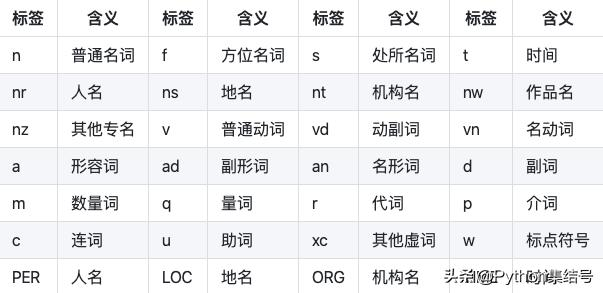

In [118]:
[[tk[0],tk[1],tk[2]] for tk in jieba.tokenize(u'永和服装饰品有限公司')]

[['永和', 0, 2], ['服装', 2, 4], ['饰品', 4, 6], ['有限公司', 6, 10]]

### jieba分词器还有一个方便的地方是开发者可以指定自己的自定义词典，以便包含词库中没有的词，虽然jieba分词有新词识别能力，但是自行添加新词可以保证更高的正确率。
使用命令：
# jieba.load_userdict(filename) filename为自定义词典的路径

### 在使用的时候，词典的格式和jieba分词器本身的分词器中的词典格式必须保持一致，一个词占一行，每一行分成三部分，一部分为词语，一部分为词频，最后为词性（可以省略），用空格隔开。下面其中userdict.txt中的内容为小修添加的词典，而第二部分为小修没有添加字典之后对text文档进行分词得到的结果，第三部分为小修添加字典之后分词的效果。

### 示例：
### userdict.txt自定义文件

云计算 5
李小福 2 nr
创新办 3 i
easy_install 3 eng
好用 300
韩玉赏鉴 3 nz
八一双鹿 3 nz
台中
凱特琳 nz
Edu Trust认证 2000